# ASSESSMENT 1: REGRESSION ANALYSIS

## 1. Business Objectives

To a consumer, the difference between good and bad wine depends on several subjective sensory properties i.e. sweetness. These properties are dictated by chemical compounds such as residual sugar, pH and the relationship between the levels of these compounds. Sweetness of a wine is from the interaction of residual sugar, alcohol and acids. With alcohol and sugar promoting the wines sweetness while acids counteract it. For our case, the wine is described by 11 traits. 

Our objectives are: 
1. Examine which trait(s) contribute significantly to quality 
2. Examine the relationship between traits in determining wine quality
3. Create a model that can accurately predict the quality of wine when presented with value for traits

### 1.1 Assessing the situation

- **Personel** - The study will be conducted by a data specialist. All stages from data acquisition to modelling shall be tasked to the specialit.
- **Data** - The dataset to be used will be from the [UCI ML repository](https://archive.ics.uci.edu/ml/index.php) wine dataset. With focus beign on the <mark>white wine dataset</mark>.
- **Computing Resources** - We will use Google Colab with 4 GB of memory available.
- **Software** - Python 3.6 will be used with extensive use of the pandas, seaborn, matplotlib and scikit libraries.


## 2. Data Understanding

### 2.1 Data Acquisition

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes= True)

Import our libraries and set some program options

In [2]:
# Fetch our data
wine_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep= ";")

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Get our data from a url and look at the first 5 rows

### 2.2 Describe our data

In [3]:
wine_df.shape

(4898, 12)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


We see that the data is comprised of numeric values

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


None of our variable are highly skewed. All in all our data looks good.

In [6]:
wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

We have more instances of mid-quality wine and very few of high quality wine.

### 2.3 Verify Data

In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We have no missing values.

### 2.4 Exploratory Data Analysis

It was mentioned that a property like sweetness depends on variables like alcohol, sugar and acidity. Given this knowledge we will develop a pseudo-hypothesis and investigate whether sweet wine is synonymous with quality.

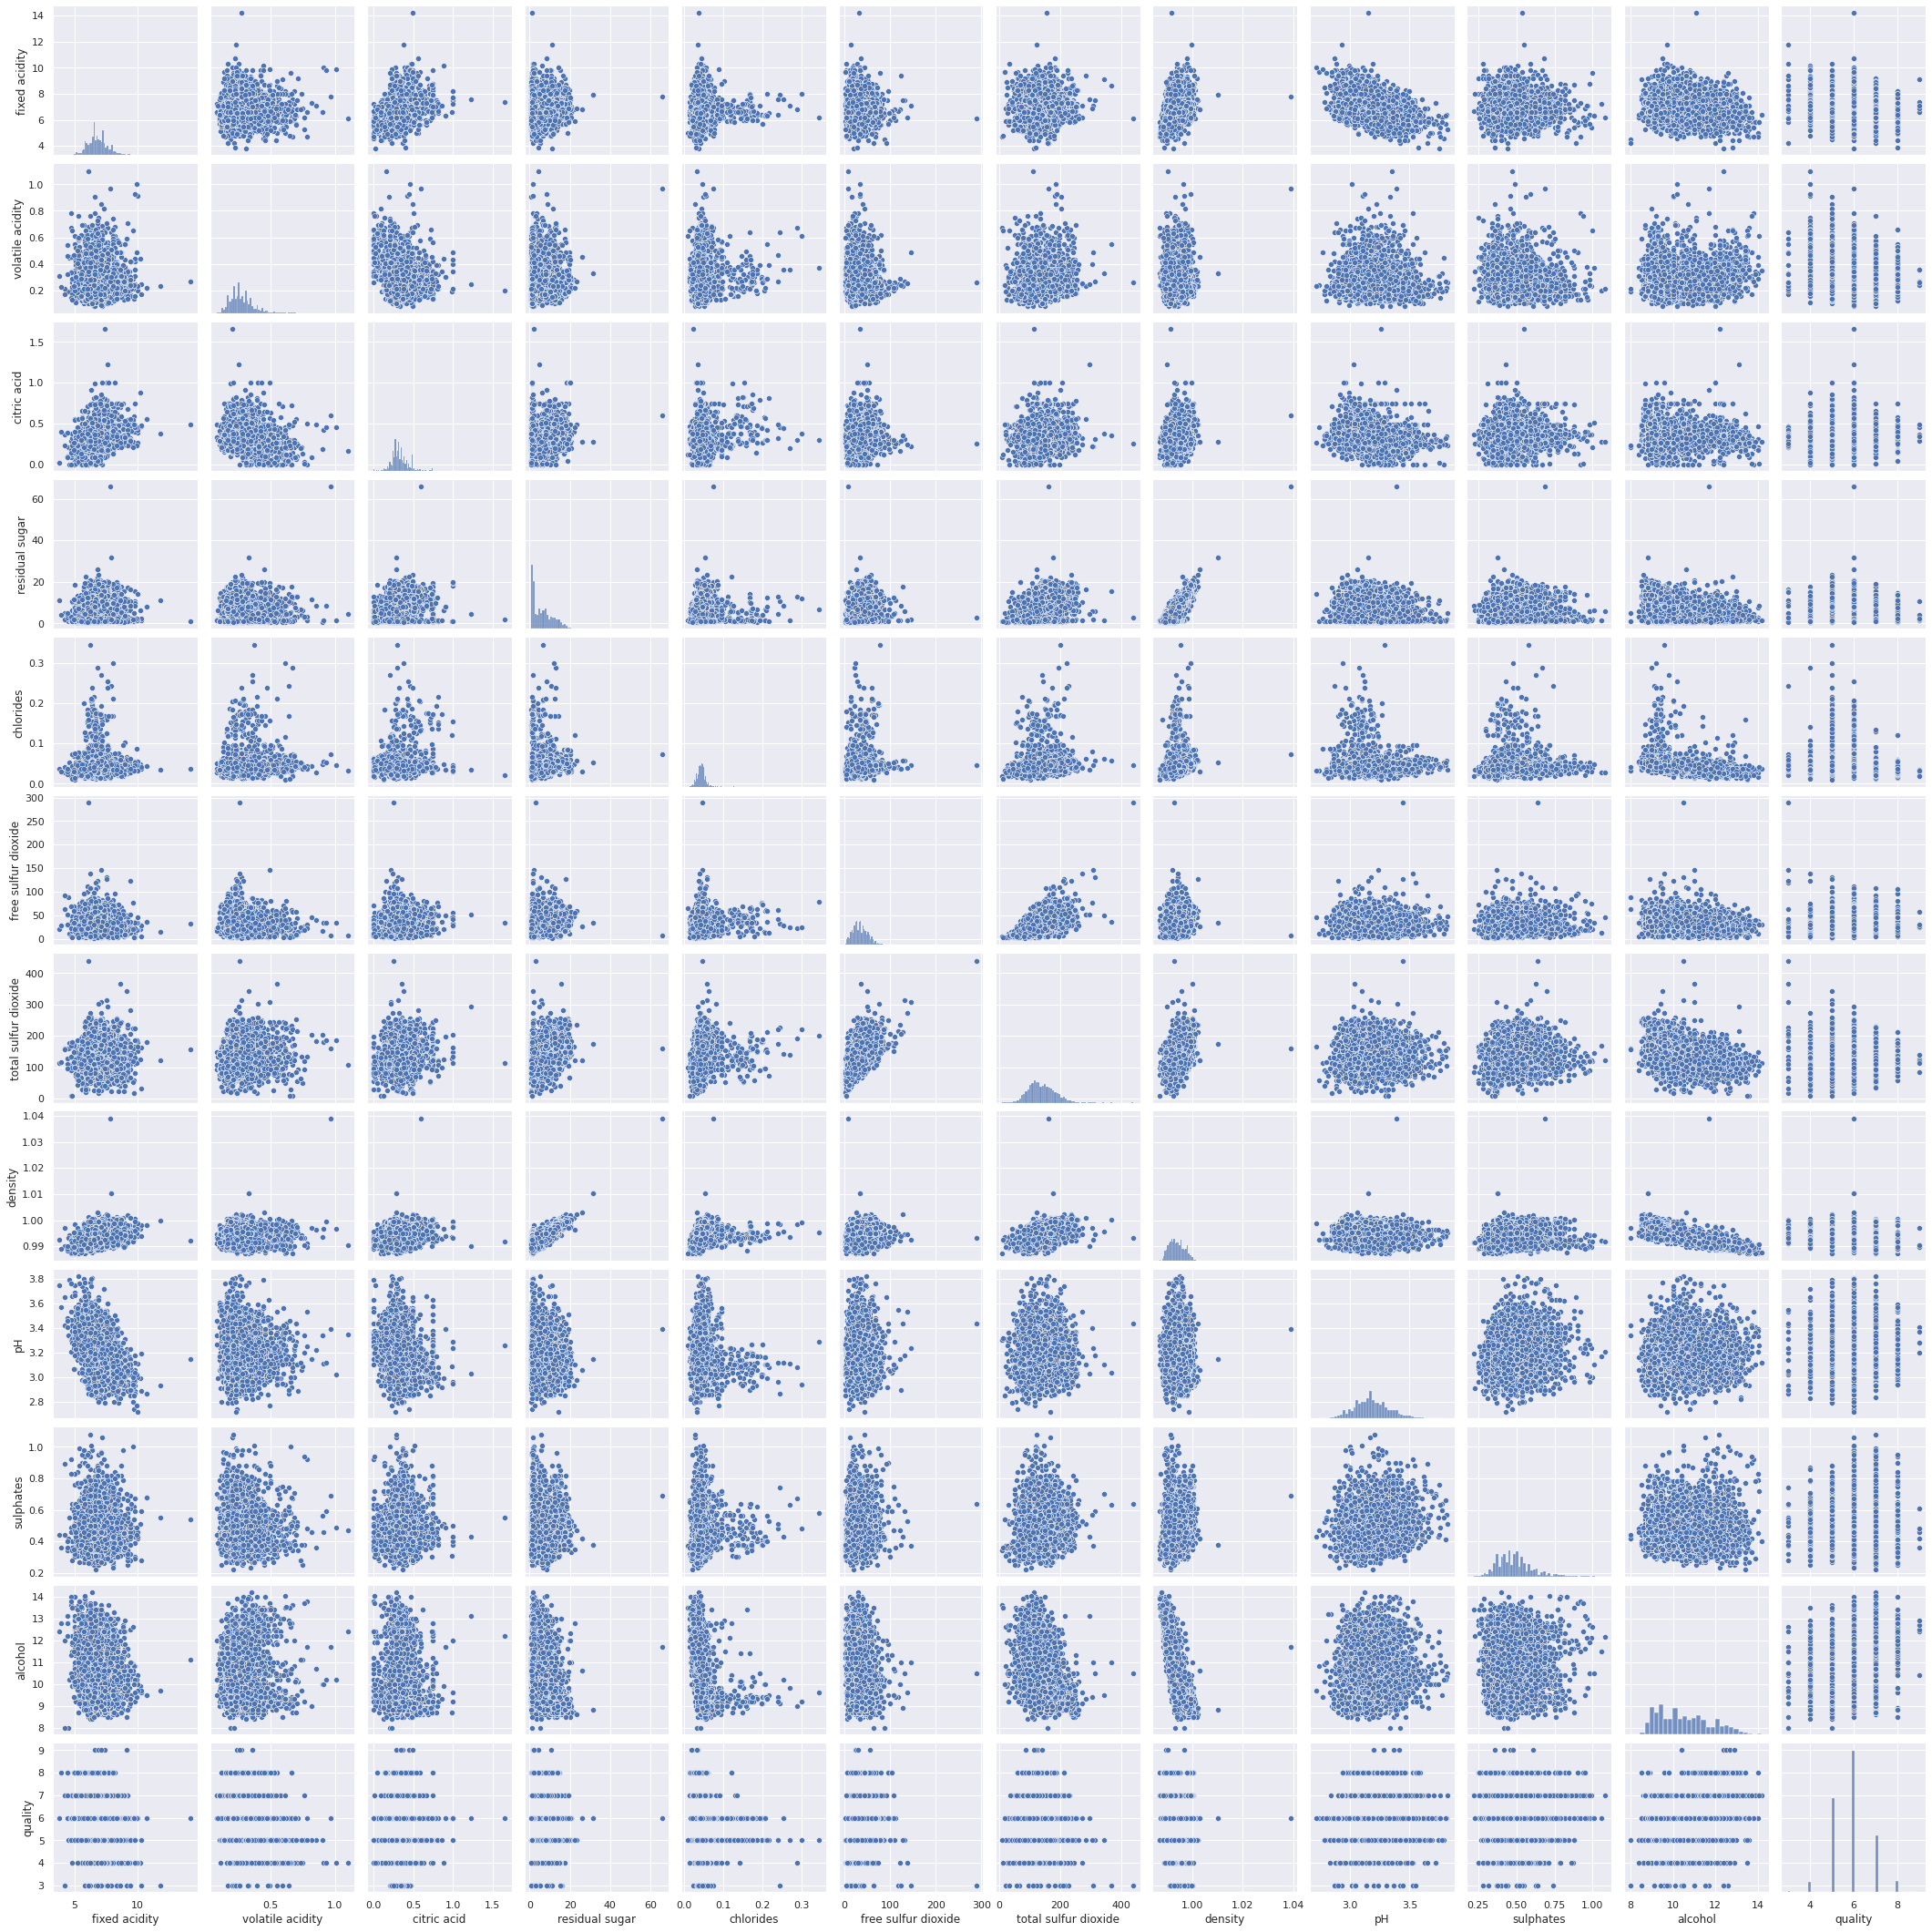

In [8]:
sns.pairplot(wine_df)

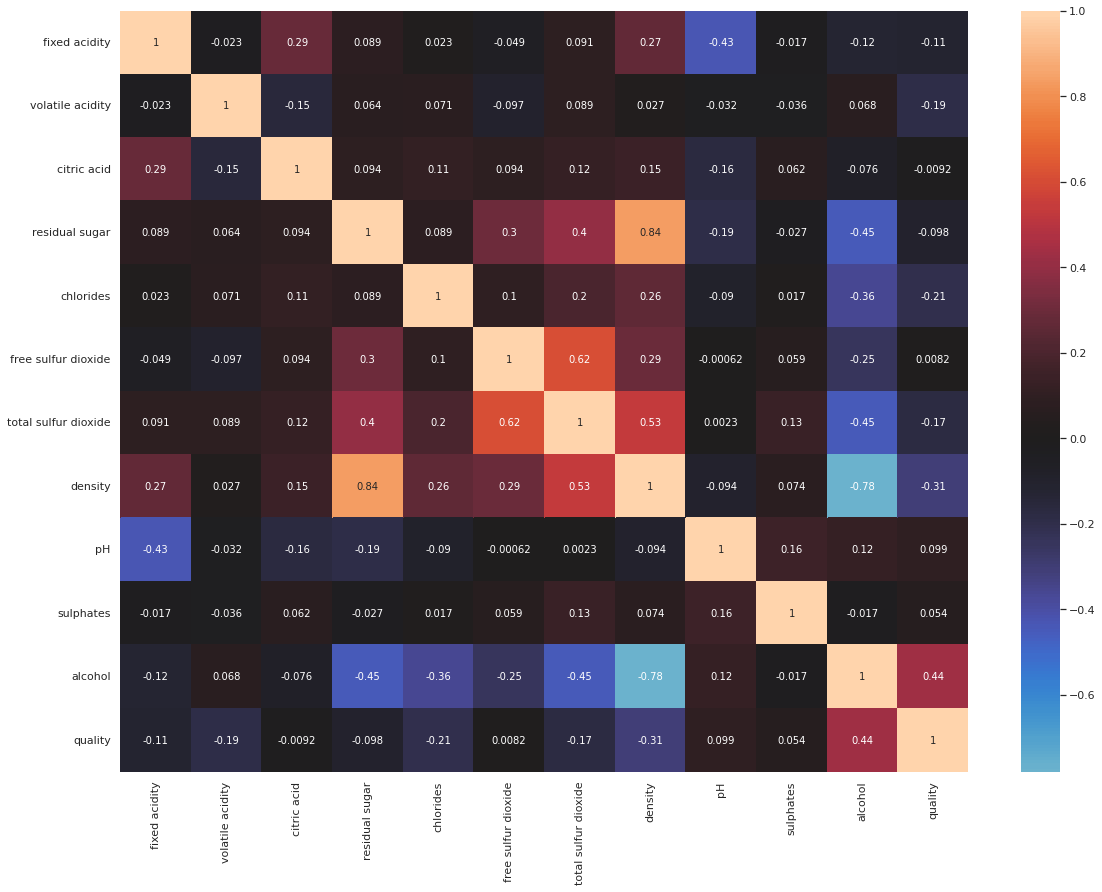

In [9]:
fig = plt.figure(figsize=(19,14))

corr = wine_df.corr()
sns.heatmap(data=corr, center=0, annot=True)

From the two visualizations we are able to conclude the following:
- A moderate correlation(+ve) between quality and alcohol
- There is a strong correlation (-ve) between density and alcohol
- A strong correlatio (+ve) between density and residual sugar
- A moderate correlation (+ve) density and total sulfur oxide
- A moderate correlation (+ve) between total sulfur oxide and residual sugar
- A moderate correlation (-ve) between total sulfur oxide and alcohol
- A moderate correlation (-ve) between alcohol and chlorides
- A moderate correlation (+ve) between fixed acidity and density
- A moderate correlation (-ve) between fixed acidity and pH

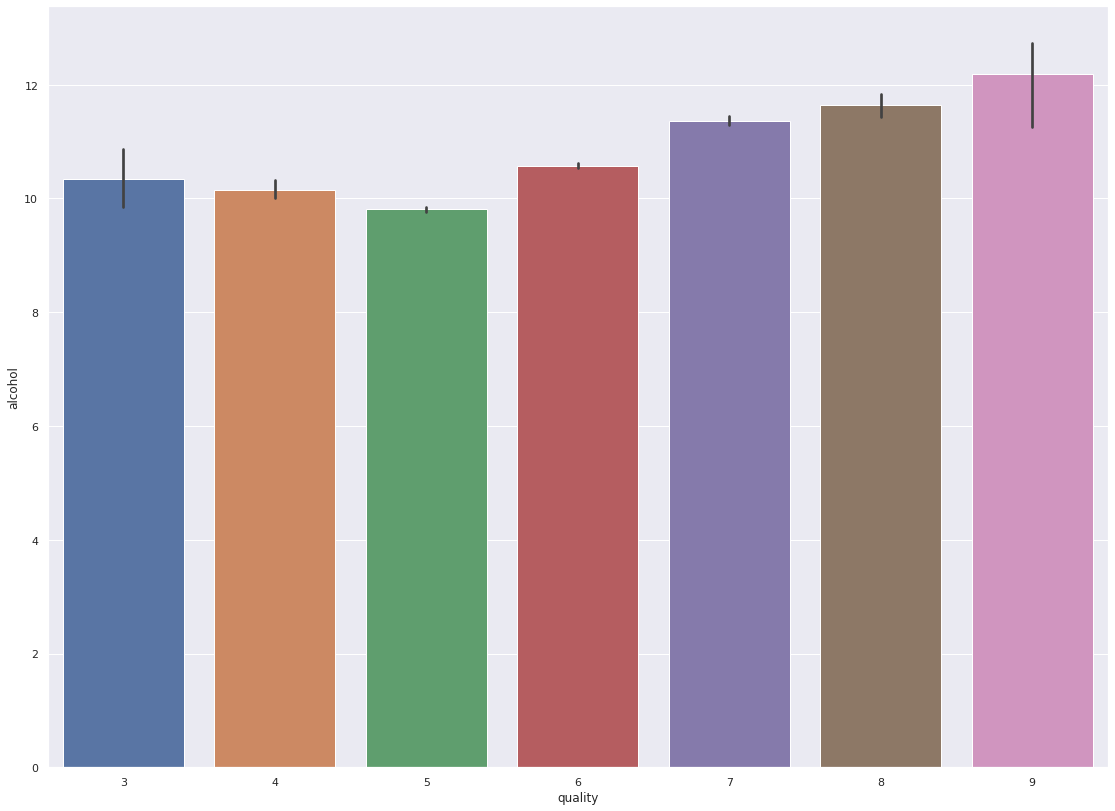

In [10]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=wine_df,x='quality', y='alcohol')

We start by analysing the relationship between alcohol and quality. Our observation is that high alcohol quantities result in better quality.

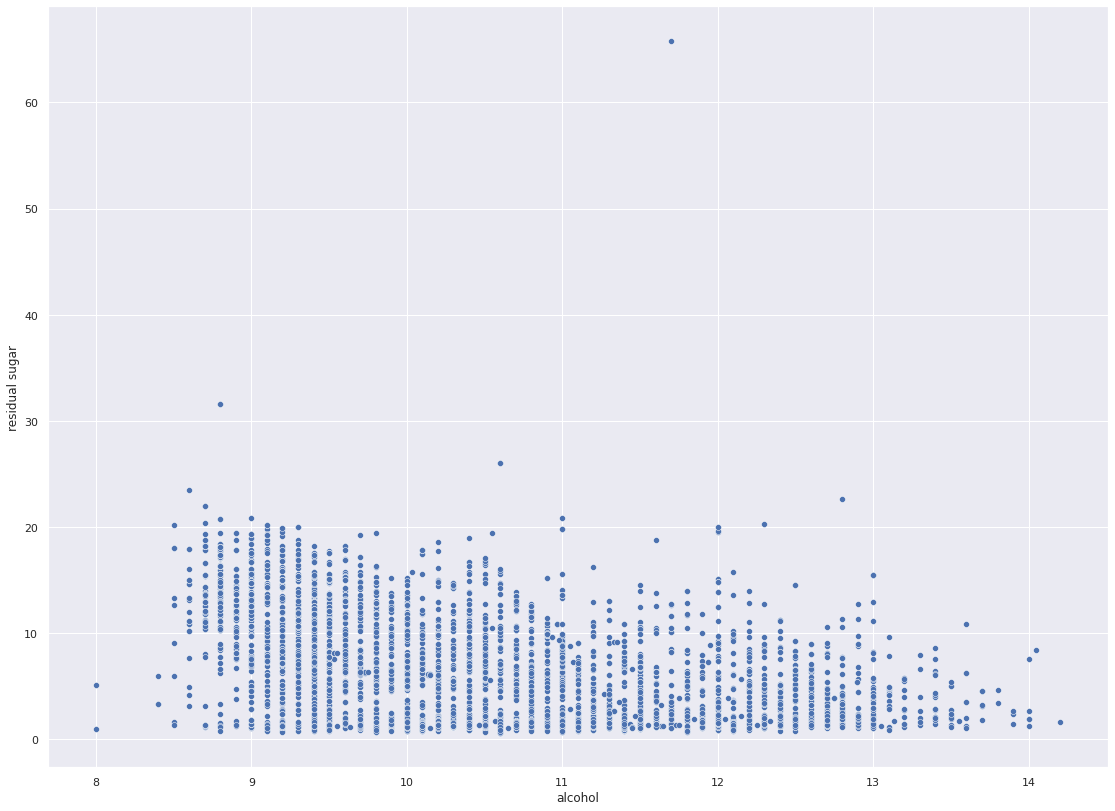

In [11]:
fig = plt.figure(figsize=(19, 14))
sns.scatterplot(data=wine_df, x='alcohol',y='residual sugar')

When we analyze the relationship between alcohol and residual sugar we see a negative correlation.

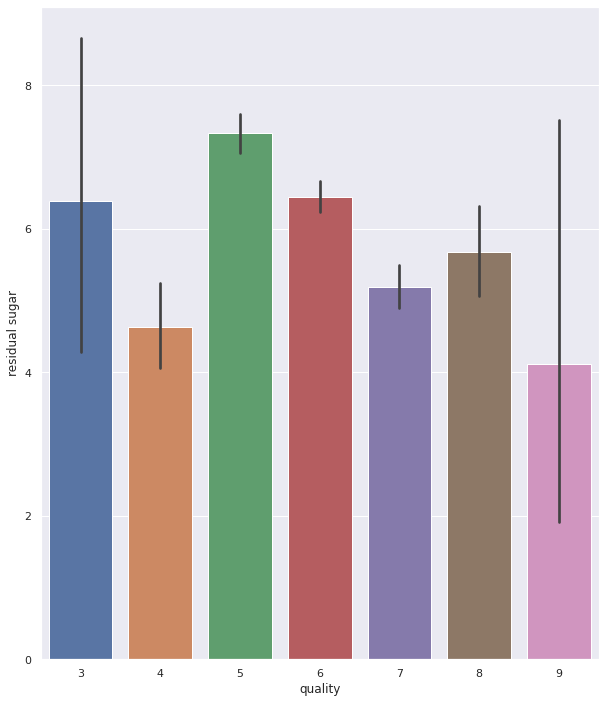

In [12]:
fig = plt.figure(figsize=(10, 12))
sns.barplot(data=wine_df, x='quality',y='residual sugar')

It is no surprise that high quality wine has the least amount of residual sugar.

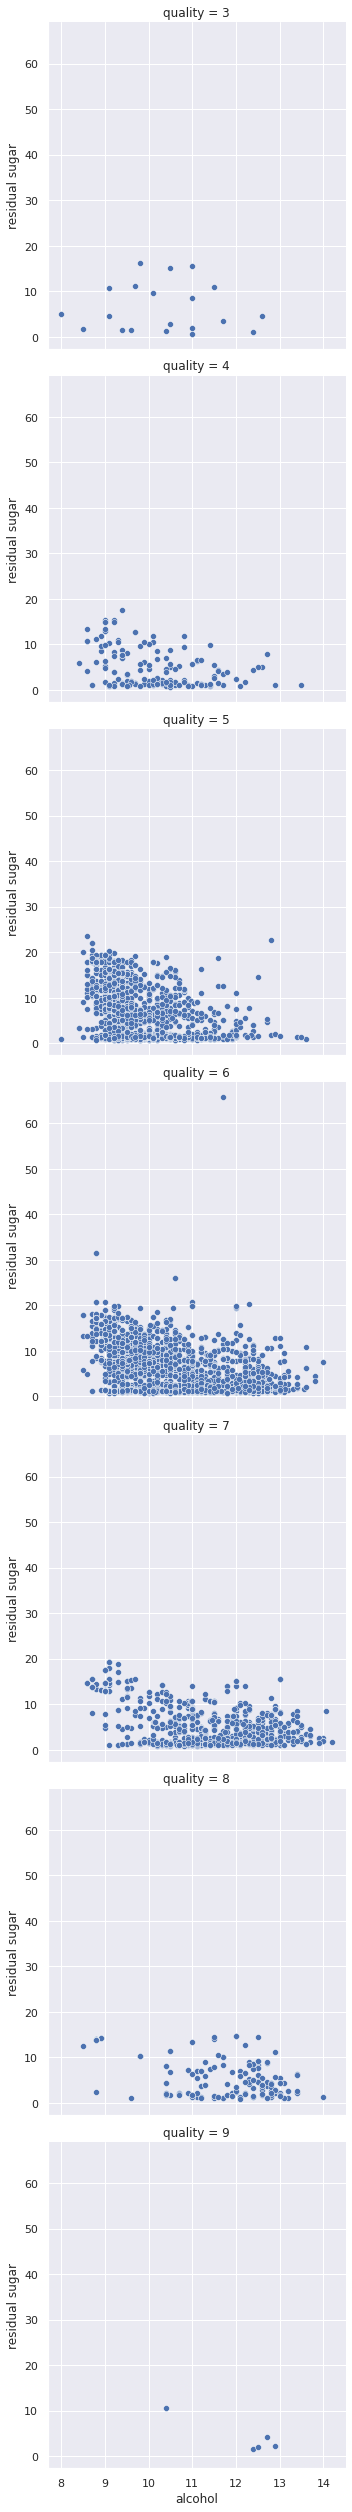

In [13]:
sns.relplot(data=wine_df, x='alcohol', y='residual sugar', row='quality', sizes=(15,50))

We can visualize how relationships between alcohol and residual sugar vary for every output of quality.

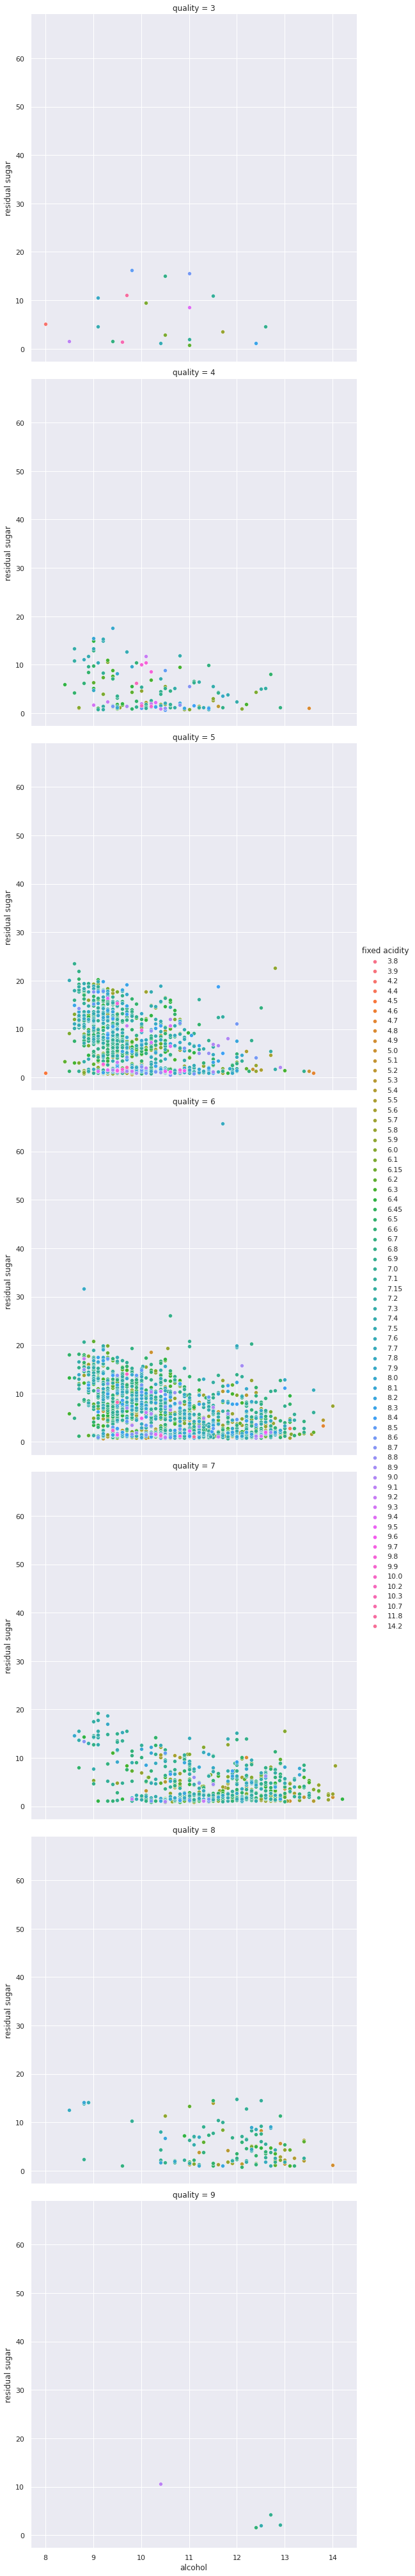

In [14]:
g = sns.FacetGrid(wine_df, hue="fixed acidity", row="quality", height=8)
g.map(sns.scatterplot, "alcohol", "residual sugar")
g.add_legend()

We go a step further and visualize how residual sugar, alcohol, fixed acidity and quality relate. It looks like the answer to our question is no. Wine that is too sweet is not necessarily quality wine. It is suggested that a balance between sweetness and sourness is better. 

Our model should be able to interpret such relationships.

## 3. Data preparation

### 3.1 Selecting data

In [15]:
wine_df = wine_df.drop(columns='density')

We will drop density from our columns as it show a high collinearity with alcohol. This will prevent our model from over-fitting and preserve the statistical significance of alcohol as a predictor variable.


In [16]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
data = wine_df.values # Read our values into an array
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)
print(X_train.shape, y_train.shape) 

# Remove outliers
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, y_train.shape)

# Normalize our data
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(3281, 10) (3281,)
(3237, 10) (3237,)


We read our data into an array, removing the columns. Split it into an array of independent variable (X) and dependent variable (y). Then we create our test and train sets for our model.
We then remove outliers (44 of them) in our training sets. Finally we normalize our independent variables.

## 4. Modelling

### 4.1 Importing the model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We will use the Linear regression model from scikit-learn and evaluate the performance of our model using mean absolute error loss function

### 4.2 Model assumptions.

As we are using linear regression it is implied that we are treating our target variable (quality) as quantitative. In actuality, it is qualitative (even the name gives it away) and it would be preferable to treat this problem as a classification problem or at least solve it using ordinal regression. But as per our requirements we will proceed with linear regression.

### 4.3 Build Model

In [21]:
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train,y_train)
# evaluate the model
y_pred = model.predict(X_test)


# evaluate predictions
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

r2_score(y_test,y_pred)

0.7537614737055743


0.2553541027559224

We build a linear regression with default parameters and calculate root-mean-squared-error for our regression loss.

### 4.4 Assess Model

In [22]:
test_df = pd.DataFrame(y_test).set_axis(['test'], axis=1)

pred_df = pd.DataFrame(y_pred).set_axis(['prediction'], axis=1)

print(test_df.head(10), '\n')
print(pred_df.head(10))


   test
0   7.0
1   8.0
2   8.0
3   5.0
4   7.0
5   6.0
6   5.0
7   4.0
8   6.0
9   5.0 

   prediction
0    6.326260
1    6.425453
2    6.407127
3    5.746885
4    6.402751
5    6.352692
6    5.171874
7    5.480649
8    6.010001
9    5.202446


Our model is not performing particularly well. The RMSE value is 0.754 which is particularly high and the R2 score is 0.25 which is low. The model fails to be satisfactory and should be considered a poor model 

## 5. Evaluate

We were able to partially answer our business objectives. Through the exploratory analysis we observed how the independent variables related with each other and with the dependent variable. However, when developing our model we see it fail to predict accurately. 

This failure was expected as it was speculated that the linear regression model may be insufficient for the problem. We visualize the failure of our model above. By looking at the test output and predictions we see that our prediction value are continous. This explains why our error calculations are high.

For better prediction results classification models should be considered.

## 6. Deployment

Throughout this process I am able to better appreciate the need for methodologies in data science/machine learning projects. I have been introudced to CRISP-DM as one of those methodologies. 

Working with data can prove to be challenging. Through this experience I have experienced how misinterpretation of data can lead to failure. In my case, assuming an ordinal variable to be numerical meant the model designed would perform poorly irregardless of what data preparation techniques were implemented.

It is now clear to me that defining the business objectives and accurate data description as the two most important steps. Any error in these phases could render the entire project pointless.

A future attempt will be made to represent the problem as a classification problem or even implement a regression model for ordinal values and hopefully better answer the business objectives. 